# Graphing the simulation time for serial otb implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

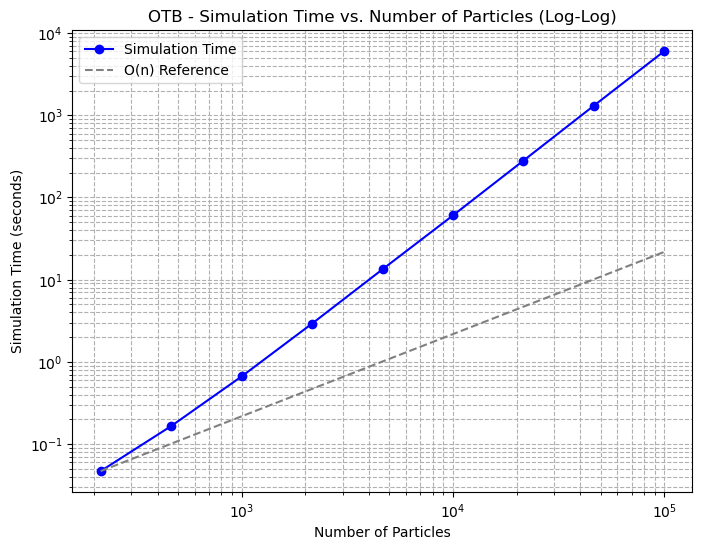

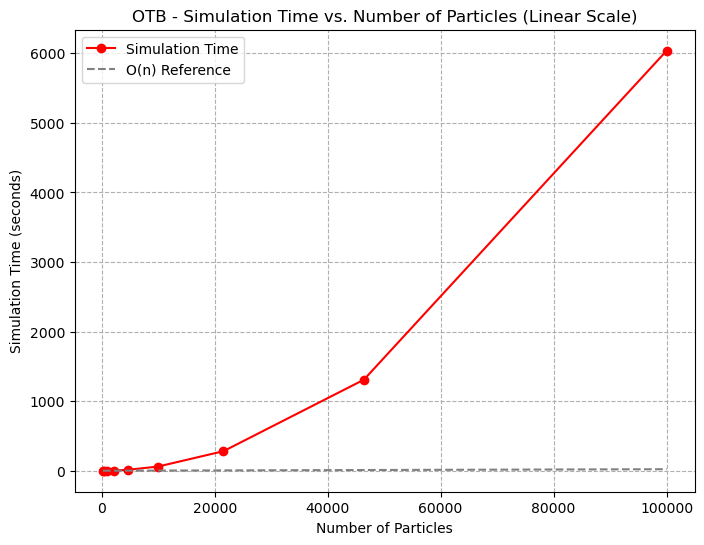

In [2]:
# Load data
data = np.loadtxt("./serial_out/simulation_times.txt", delimiter=" ", skiprows=1)

# Extract n_particles and simulation times
n_particles = data[:, 0]
simulation_times = data[:, 1]

# Generate O(n) reference line
n_min = n_particles[0]
n_max = n_particles[-1]
n_ref = np.array([n_min, n_max])
o_n_ref = simulation_times[0] * (n_ref / n_particles[0])

# Plot log-log graph
plt.figure(figsize=(8,6))
plt.loglog(n_particles, simulation_times, marker='o', linestyle='-', color='b', label="Simulation Time")
plt.loglog(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

# Labels and title of log-log
plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("OTB - Simulation Time vs. Number of Particles (Log-Log)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Show log-log plot
plt.show()

# Plot linear scale graph of linear
plt.figure(figsize=(8,6))
plt.plot(n_particles, simulation_times, marker='o', linestyle='-', color='r', label="Simulation Time")
plt.plot(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

# Labels and title of linear
plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("OTB - Simulation Time vs. Number of Particles (Linear Scale)")
plt.legend()
plt.grid(True, linestyle="--")

# Show linear plot
plt.show()


# Graphing the timing for the serial optimized implementation

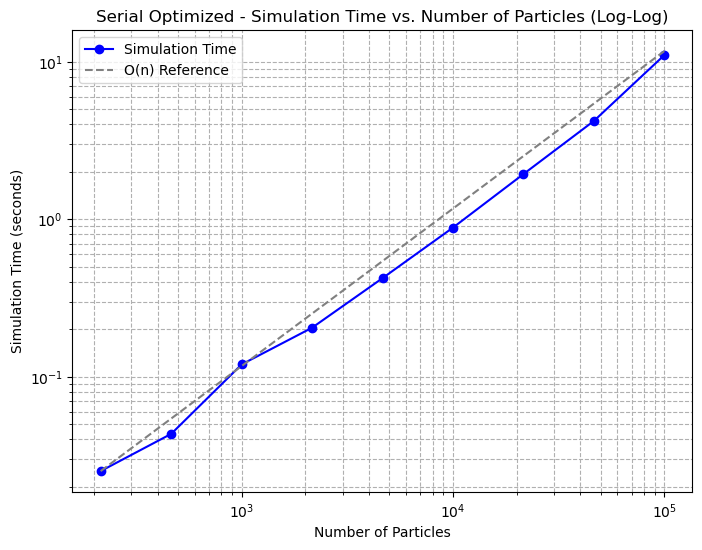

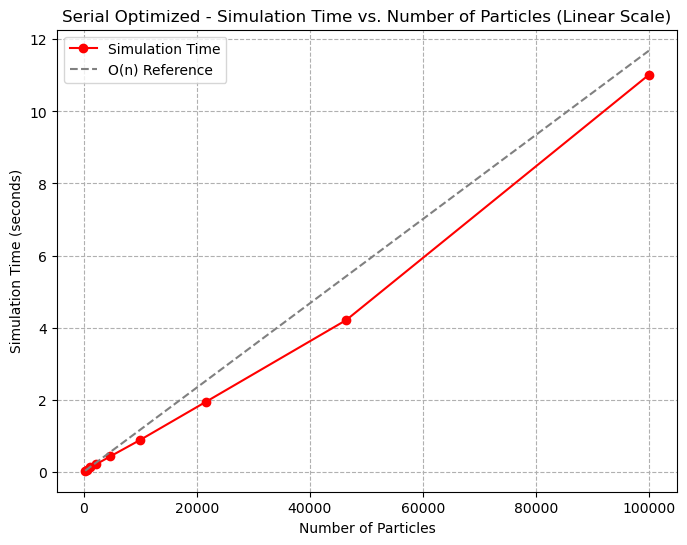

In [3]:
data = np.loadtxt("./serial_out_2/simulation_times.txt", delimiter=" ", skiprows=1)

n_particles = data[:, 0]
simulation_times = data[:, 1]

n_min = n_particles[0]
n_max = n_particles[-1]
n_ref = np.array([n_min, n_max])
o_n_ref = simulation_times[0] * (n_ref / n_particles[0])

plt.figure(figsize=(8,6))
plt.loglog(n_particles, simulation_times, marker='o', linestyle='-', color='b', label="Simulation Time")
plt.loglog(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Serial Optimized - Simulation Time vs. Number of Particles (Log-Log)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

plt.show()

plt.figure(figsize=(8,6))
plt.plot(n_particles, simulation_times, marker='o', linestyle='-', color='r', label="Simulation Time")
plt.plot(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Serial Optimized - Simulation Time vs. Number of Particles (Linear Scale)")
plt.legend()
plt.grid(True, linestyle="--")

# Show linear plot
plt.show()
